# Logistic Regression

## Table of Contents

1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Logistic Function](#function)
4. [Logistic Regression](#regression)

## Introduction<a id='introduction'></a>

In regression analysis, logistic regression[[1]](https://jamanetwork.com/journals/jama/article-abstract/2540383) (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value)[[2]](https://en.wikipedia.org/wiki/Logistic_regression). 

Logistic regression uses an equation as the representation, very much like linear regression.

$$\hat{y}=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}}$$

This function provides a probability between 0 and 1 which has to be mapped to binary values (0 or 1) later. That's why this function can be presented as per below.

$$P(x)=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}} ==> ln(\frac{P(x)}{1 - P(x)}) = b_0+b_1×x$$

To map the probability to binary we use:
$$\hat{y} = 0 \text{  IF  } p(x) < 0.5$$
$$\hat{y} = 1 \text{  IF  } p(x) \geq 0.5$$

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Logistic Function<a id='function'></a>

The logistic function, also called the sigmoid function was developed by statisticians to describe
properties of population growth in ecology. It’s an S-shaped curve that can take any real-valued number and
map it into a value between 0 and 1.

$$\frac{1}{1 + e^{-value}}$$

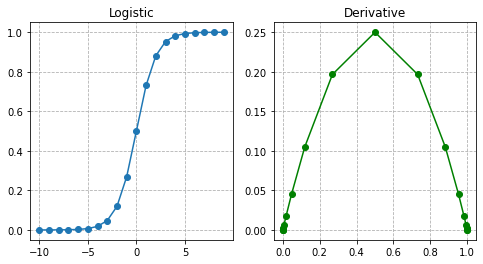

In [2]:
# Create data
x = []
for i in range(-10, 10):
  x.append(i)

df_logistic = pd.DataFrame(columns=['x']) # Convert the data into dataframe
df_logistic['x'] = x
df_logistic['Logistic'] = 1 / (1 + np.exp(-df_logistic['x'])) # Calculate the logistic of the data values using aboev function
df_logistic['Derivative'] = df_logistic['Logistic'] * (1 - df_logistic['Logistic']) # Calculate the derivative of the logistic values

# Plot the Logistic values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(df_logistic['x'], df_logistic['Logistic'], 'o-')
plt.grid(linestyle = '--')
plt.title('Logistic', fontsize=12)

# Plot the Derivative values
plt.subplot(1, 2, 2)
plt.plot(df_logistic['Logistic'], df_logistic['Derivative'], 'go-')
plt.grid(linestyle = '--')
plt.title('Derivative', fontsize=12)

plt.show()

## Logistic Regression<a id="regression"></a>

### Load Data

### Data Preparation

Since logistic regression is a linear model, we have the similar data preparation process as we have in Liner Regression. Those are:

1. The output has to have **binary variable**
2. Remove Noise
3. Inputs should have **Gaussian Distribution**
4. Correlated inputs should be removed 

